In [1]:
import iminuit
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
import numpy as np
import matplotlib.pylab as plt
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak, likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import corner
import sys
sys.path.insert(1, '/home/users/akatil/P-ONE/git/PONE_NuTau/Graphing/')
import plots

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
Now Histogramming
69
70
71
Now Histogramming
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
Now Histogramming
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
Now Histogramming
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
25

1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
Now Histogramming
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
Now Histogramming
1834
Now Histogramming
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
Now Histogramming
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
Now Histogramming
1933
1934
1935
1936
1937
1938
1939
1940
1941


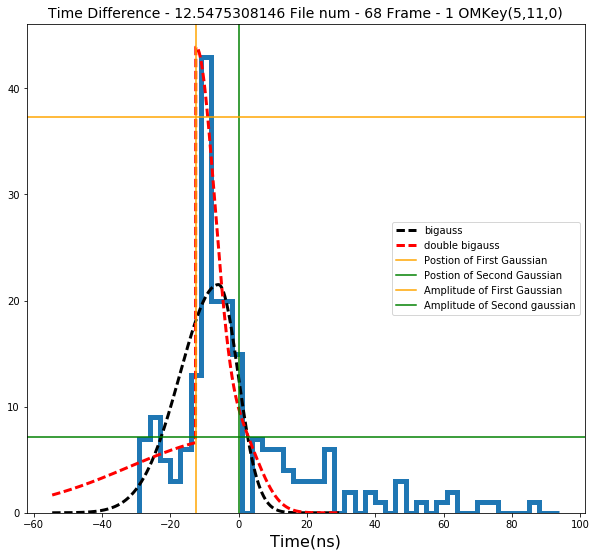

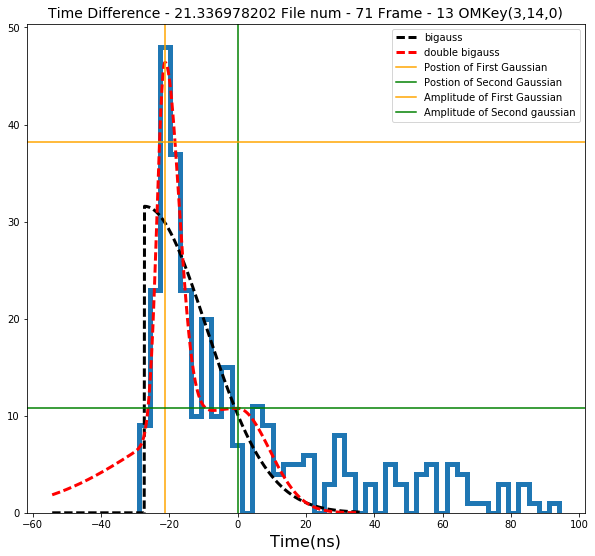

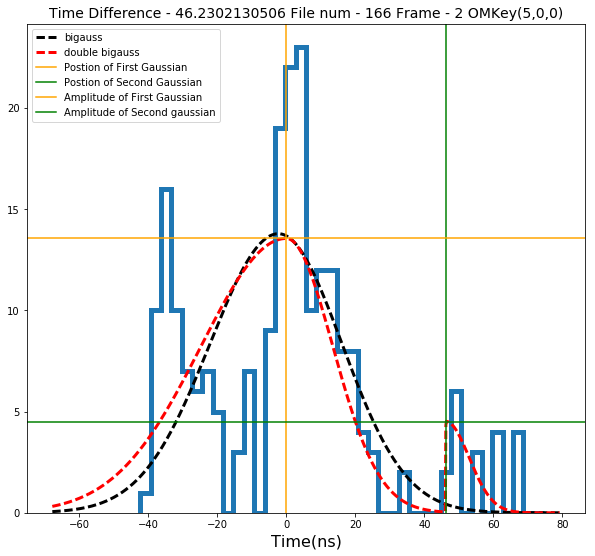

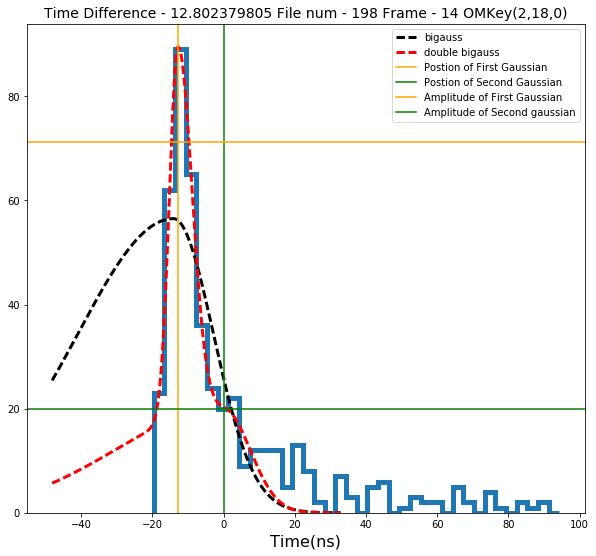

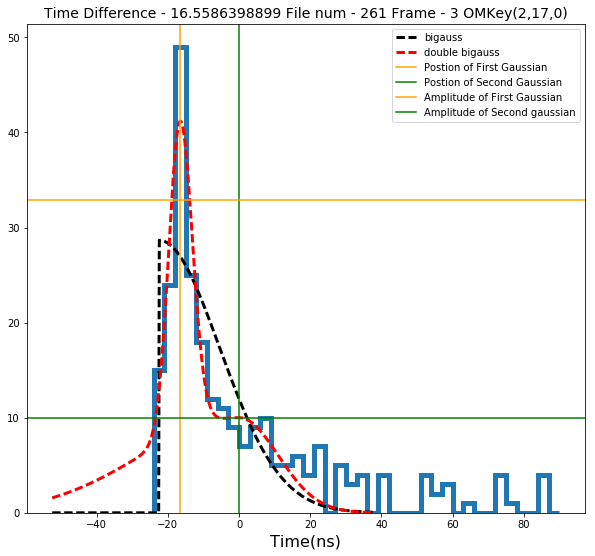

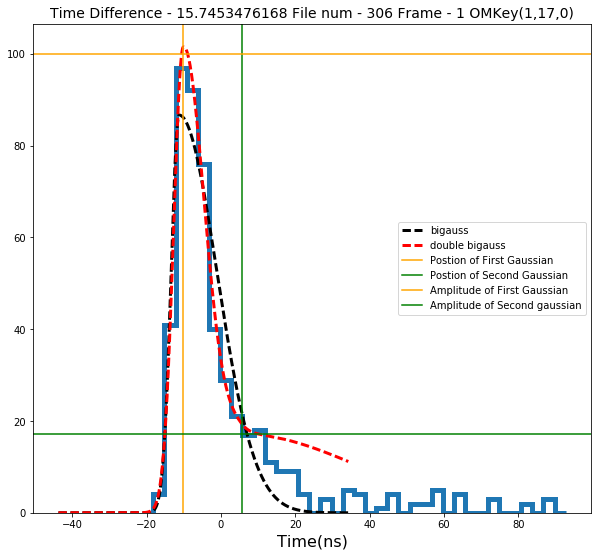

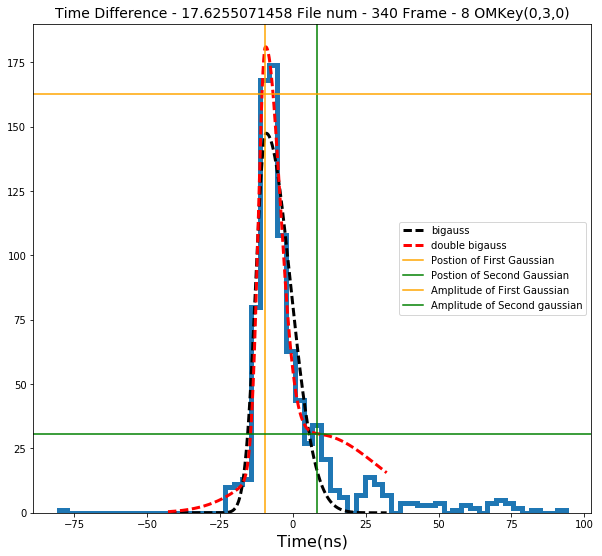

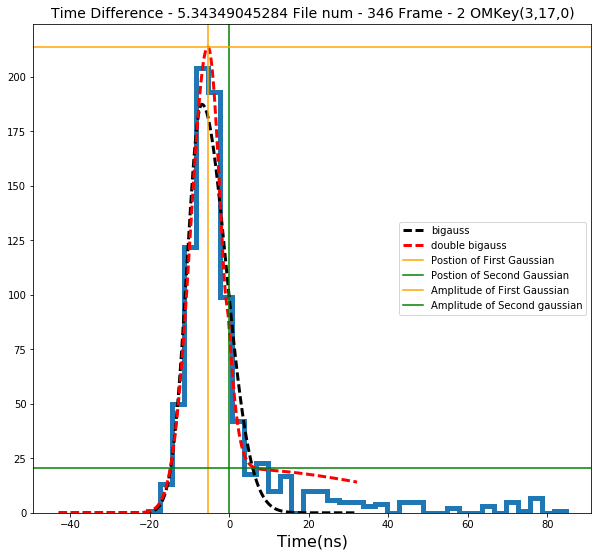

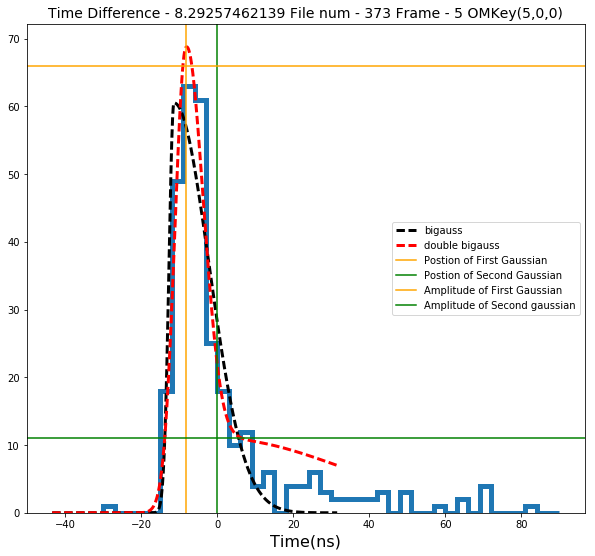

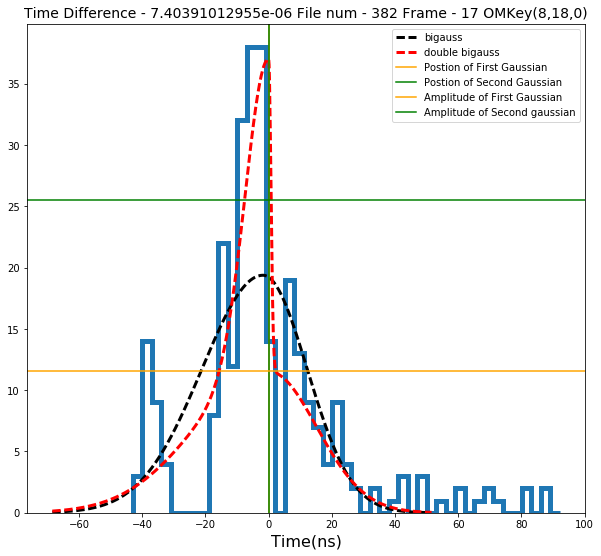

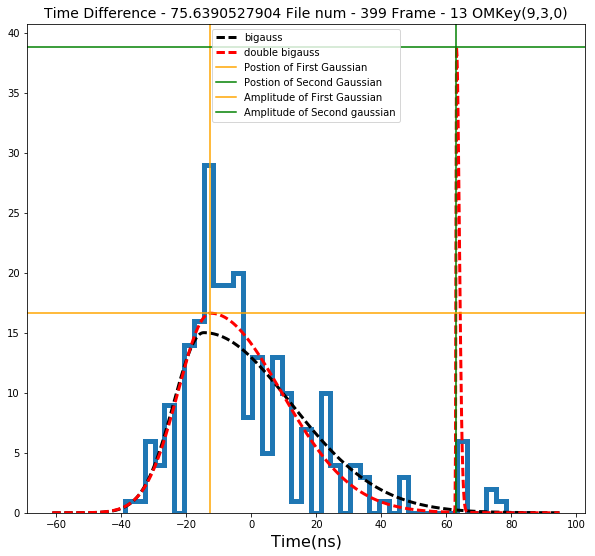

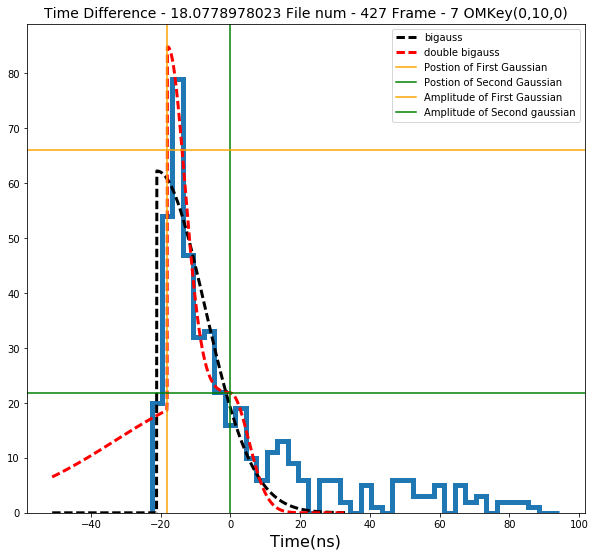

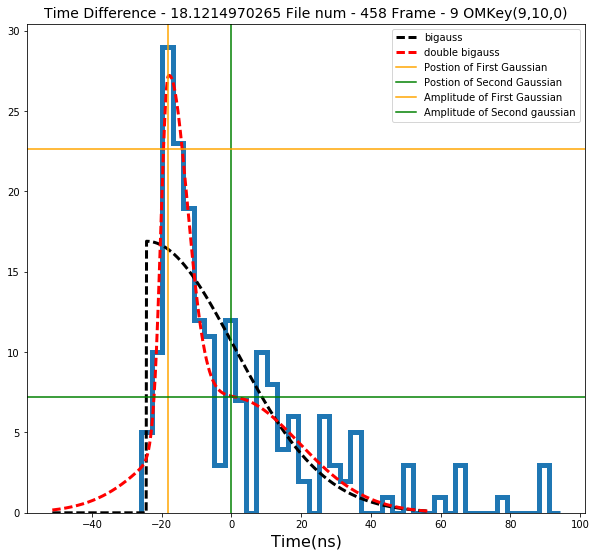

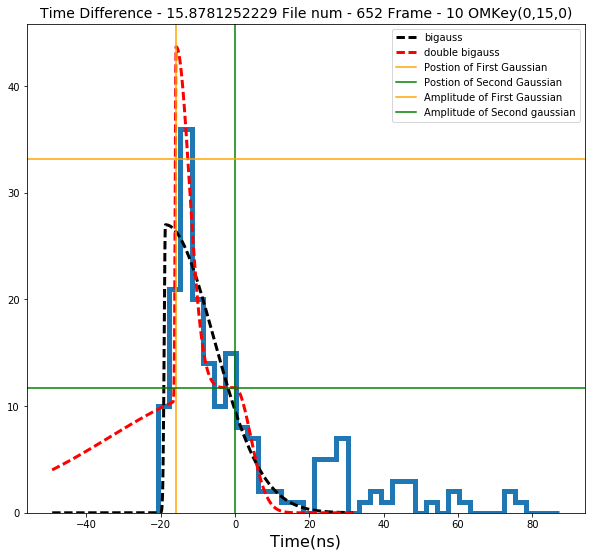

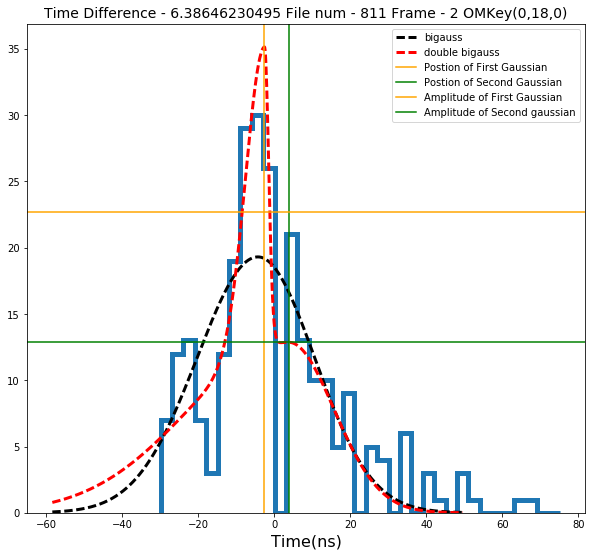

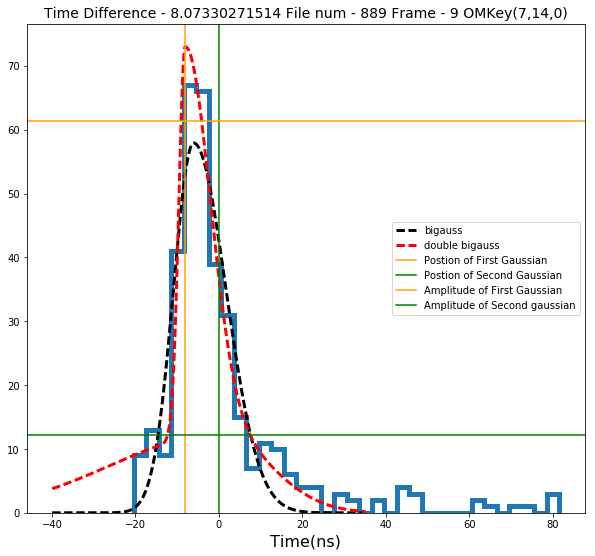

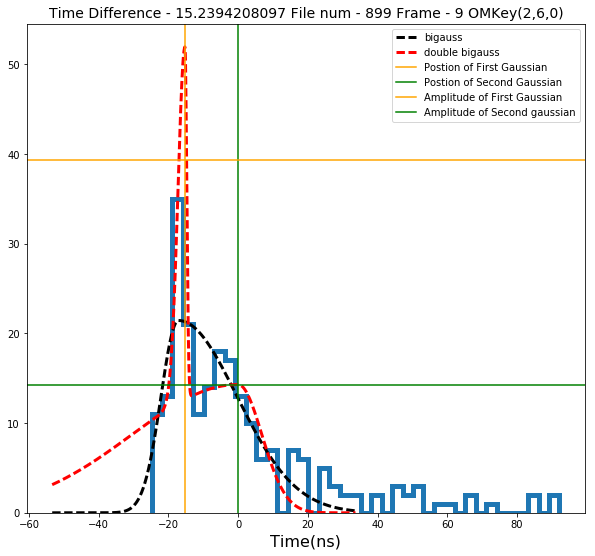

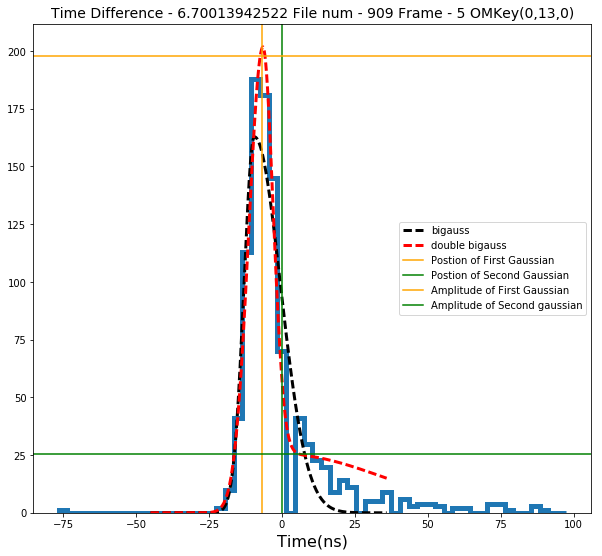

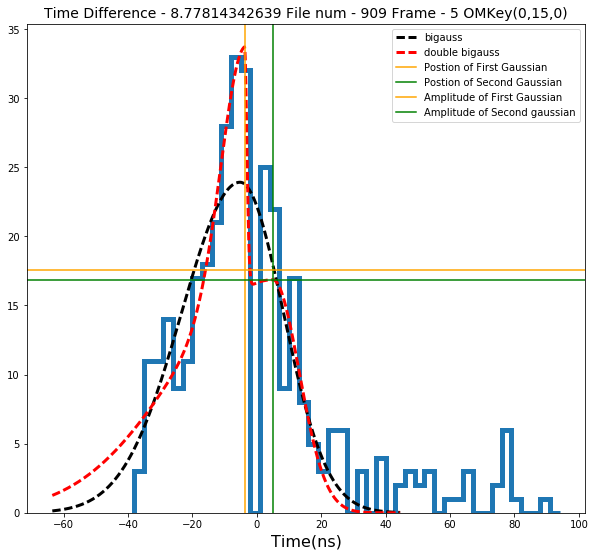

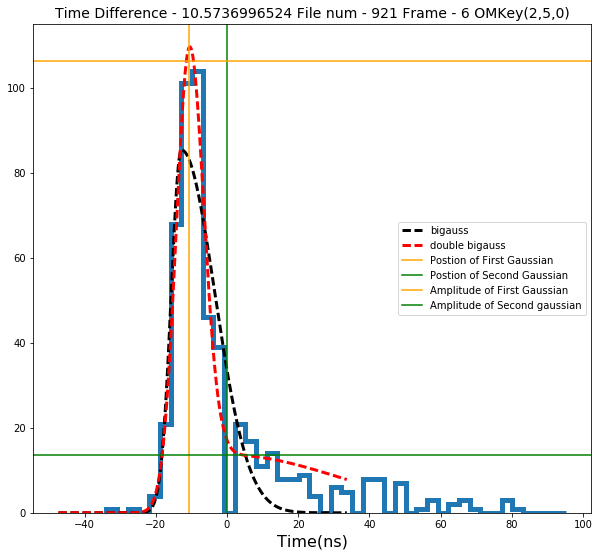

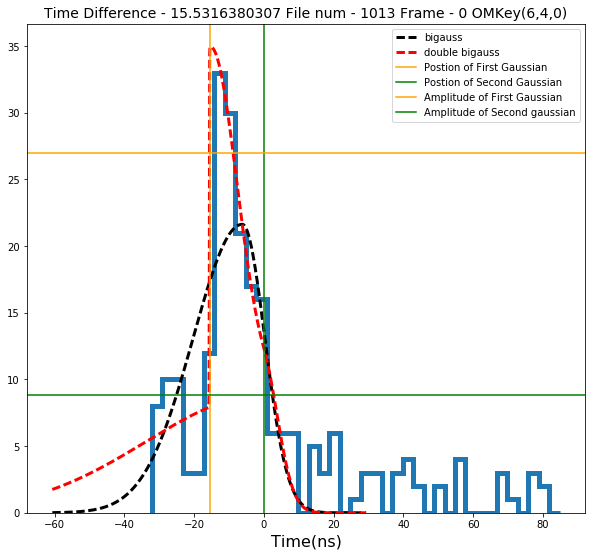

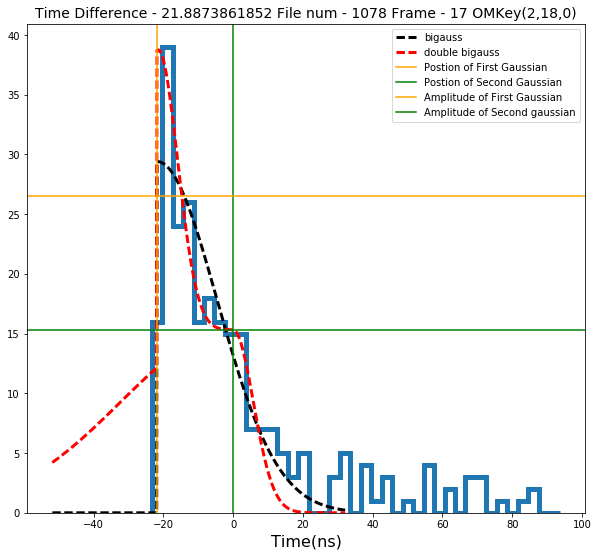

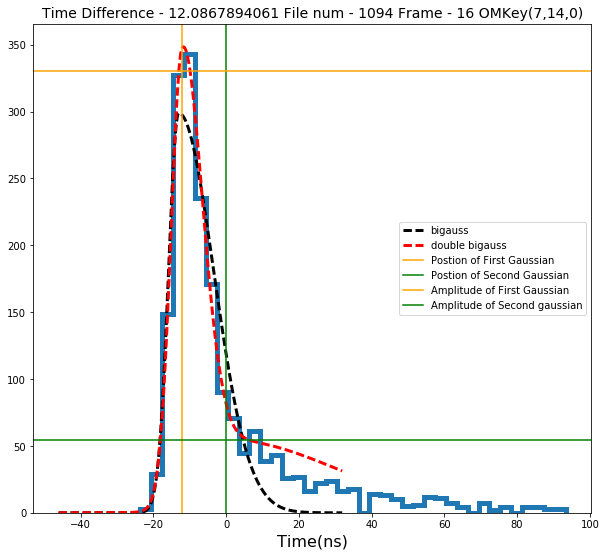

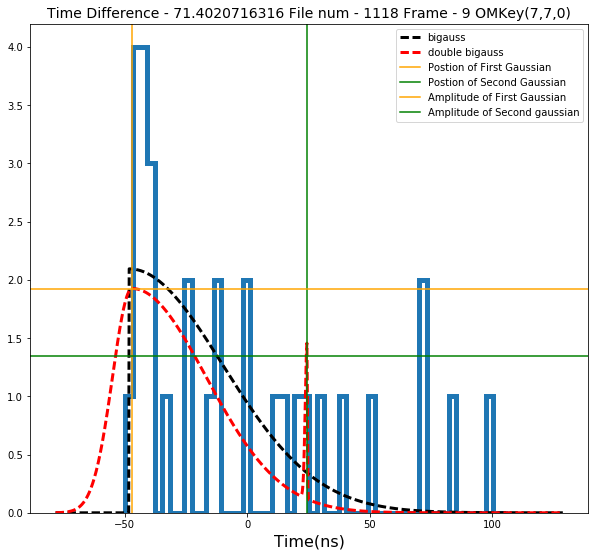

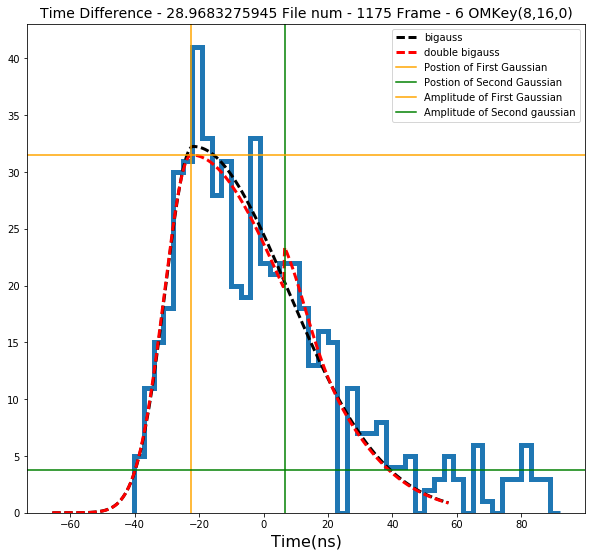

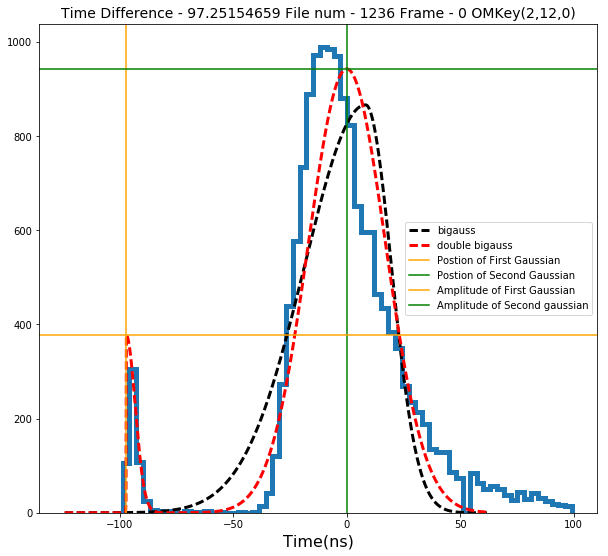

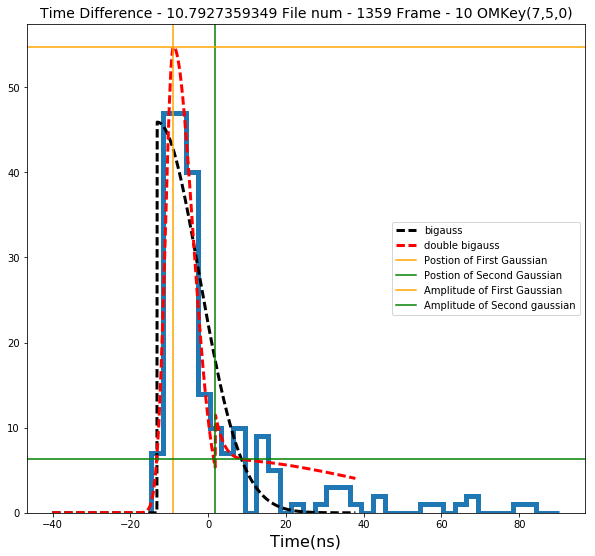

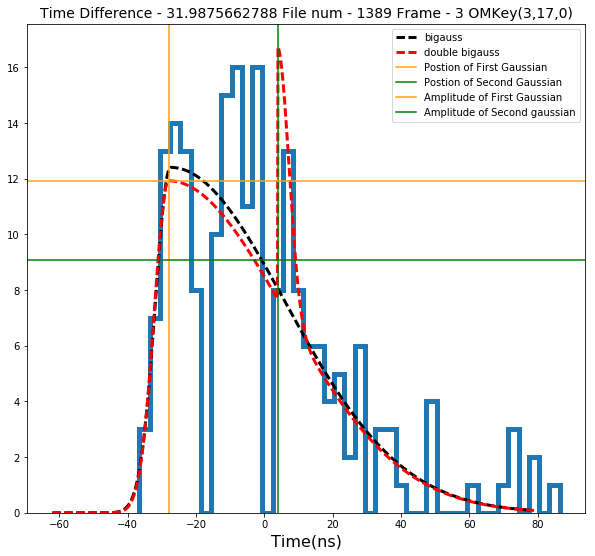

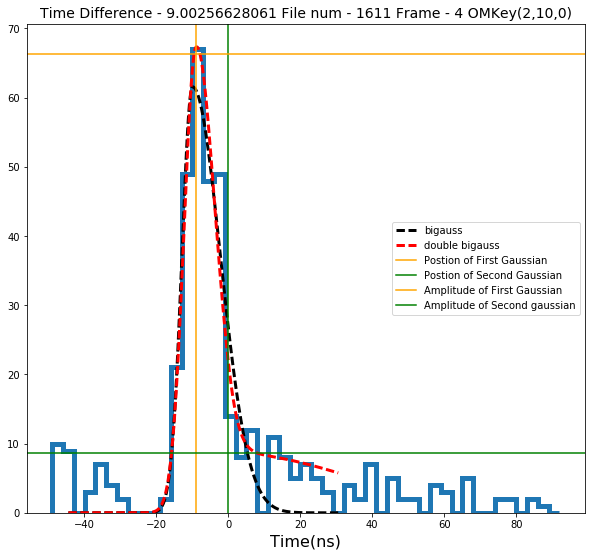

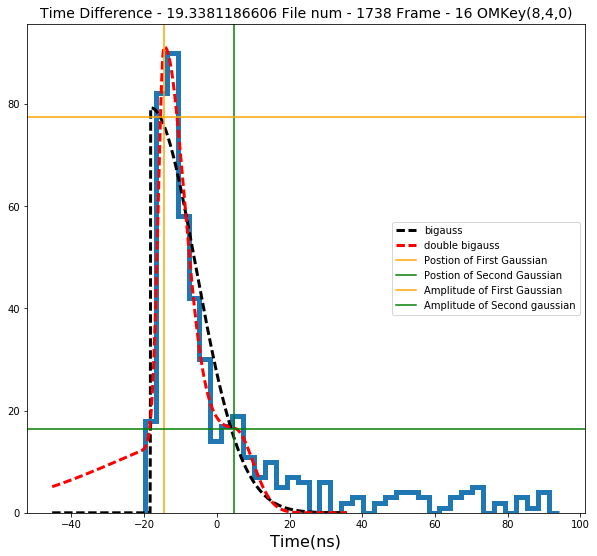

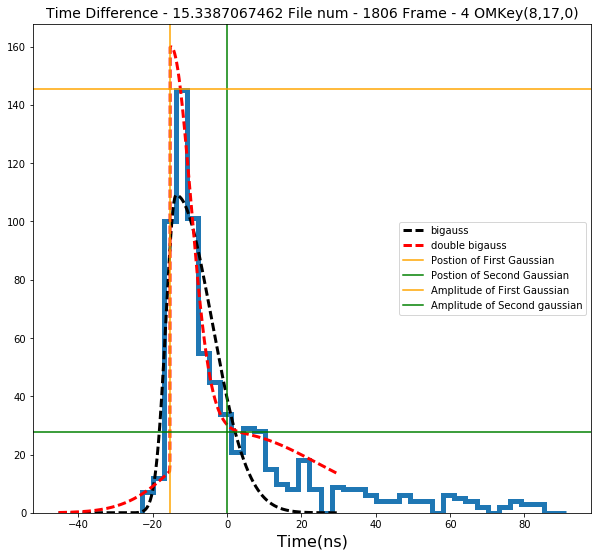

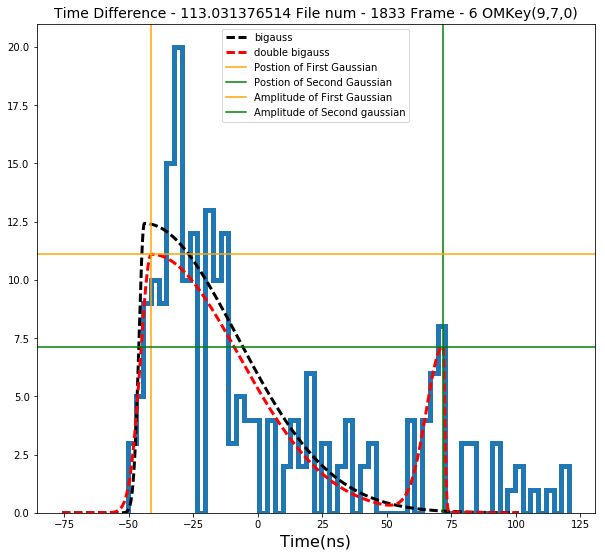

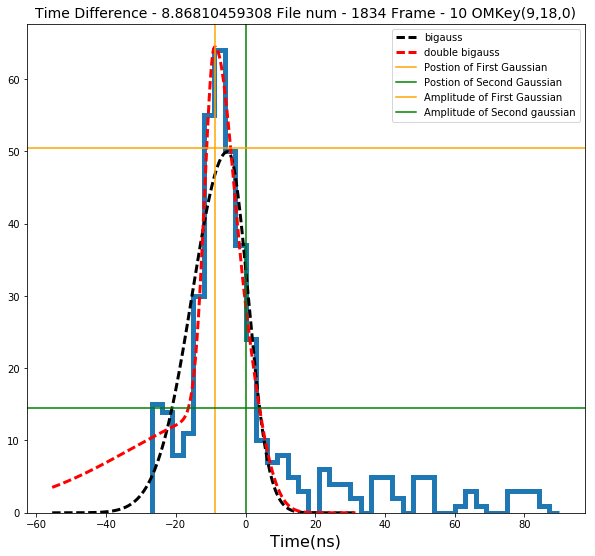

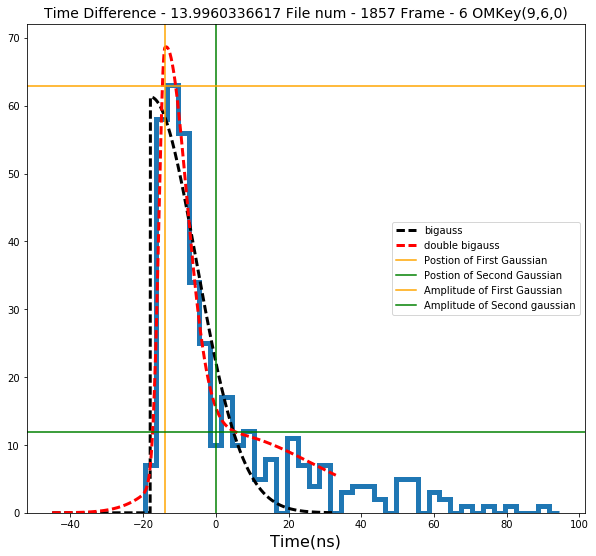

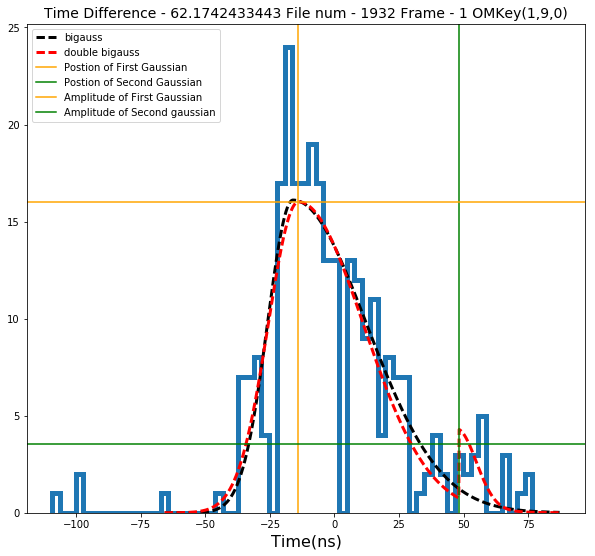

In [10]:
'''
Reading the output file
'''
timeDifferences_t = ([])
timeDifferences_e = ([])

ampRatio_t = ([])
ampRatio_e = ([])

widthRatio_t = ([])
widthRatio_e = ([])

skewnessRatio_t = ([])
skewnessRatio_e = ([])

LRR_t = ([])
LRR_e = ([])

for i in range(0, 2000):
    print(i)
    readFile = dataio.I3File('/data/p-one/akatil/step_6_analysis/NuTau_NuE_20Events_update3/step_6_'+str(i)+'_parameters.i3.gz')
    frame_num = 0
    for frame in readFile:
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
        params = frame['Parameters_doublePeak']
        params_single = frame['Parameters_biGauss']
        recoPulseMap = frame['I3RecoPulses']
        
        for omkey in params.keys():
            recoPulseList = recoPulseMap[omkey]
            recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
            recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
            vals = params[omkey]
            vals_single = params_single[omkey]
            
            tDiff = abs(vals[5]-vals[1])
            wRatio = abs(vals[2]-vals[6])
            aRatio = vals[4]/vals[8]
            lRatio = 2*abs(vals_single[0]-vals[0])
            skewRatio = abs(vals[3]-vals[7])
            
            if vals[0] != vals[0] or vals_single[0]!=vals_single[0]:
                print('Found a nan')
                print(vals_single[0], vals[0])
            
            if lepton.type == 15 or lepton.type == -15:
                timeDifferences_t = np.append(timeDifferences_t, tDiff)
                widthRatio_t = np.append(widthRatio_t, wRatio)
                plots.plot_condition(wRatio>70, vals_single, vals, recoPulse_timeList, recoPulse_chargeList, tDiff, i, frame_num, omkey)
                ampRatio_t = np.append(ampRatio_t, aRatio)
                LRR_t = np.append(LRR_t, lRatio)
                skewnessRatio_t = np.append(skewnessRatio_t, skewRatio)
            else:
                timeDifferences_e = np.append(timeDifferences_e, tDiff)
                widthRatio_e = np.append(widthRatio_e, wRatio)
                #plots.plot_condition(aRatio>1e3, vals_single, vals, recoPulse_timeList, recoPulse_chargeList, tDiff, i, frame_num, omkey)
                ampRatio_e = np.append(ampRatio_e, aRatio)
                LRR_e = np.append(LRR_e, lRatio)
                skewnessRatio_e = np.append(skewnessRatio_e, skewRatio)
        frame_num = frame_num+1

In [5]:
p = plots.plots

params = [timeDifferences_t, widthRatio_t, skewnessRatio_t, ampRatio_t, LRR_t, 
          timeDifferences_e, widthRatio_e, skewnessRatio_e, ampRatio_e, LRR_e]

p = plots.plots(params)

Will plot some pretty plots using corner and matplotlib.pyplot


(1435, 1435, 1435, 1435, 1435)
(2150, 2150, 2150, 2150, 2150)


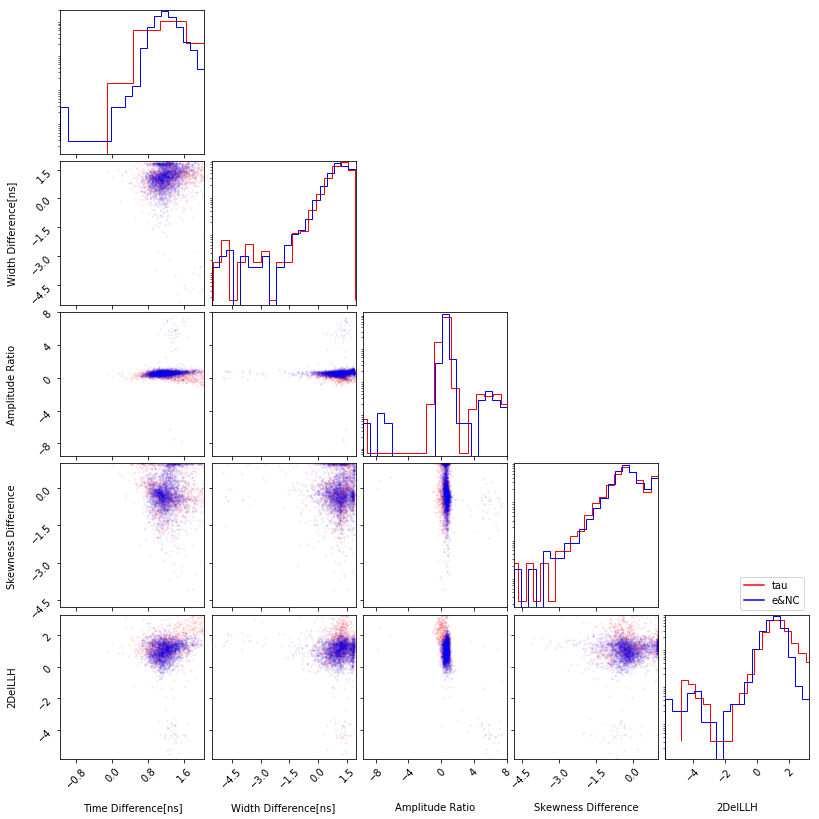

([1e-12, 200], [1e-12, 100], [1e-12, 10], [1e-12, 1000000000000.0], [1e-12, 1000000.0])
((10,), (10,), (10,), (10,), (10,))
((1435,), (1435,))


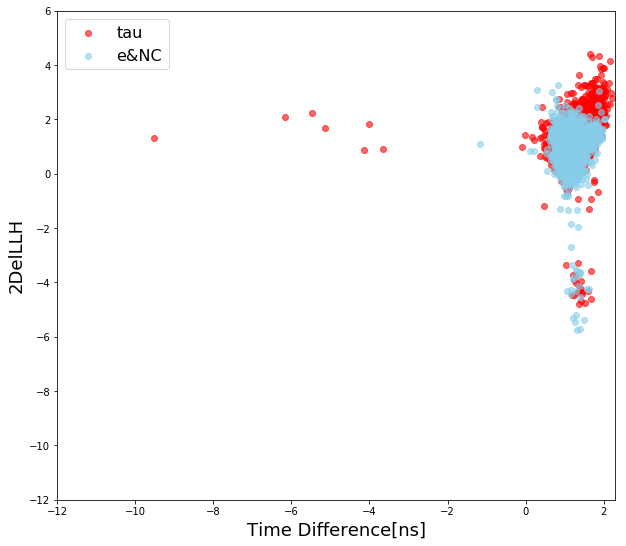

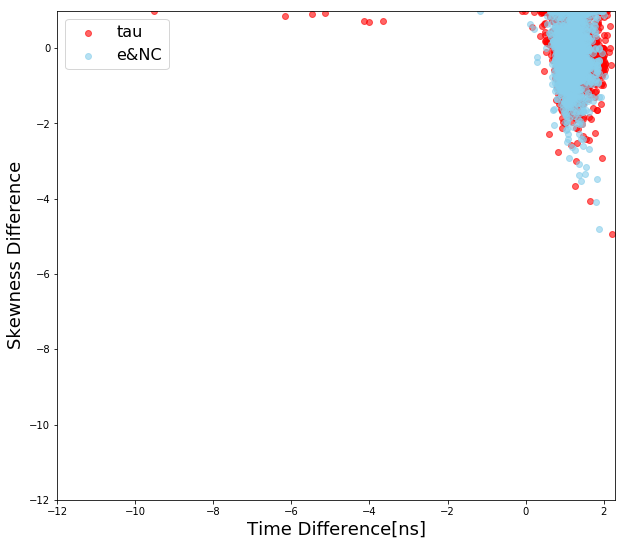

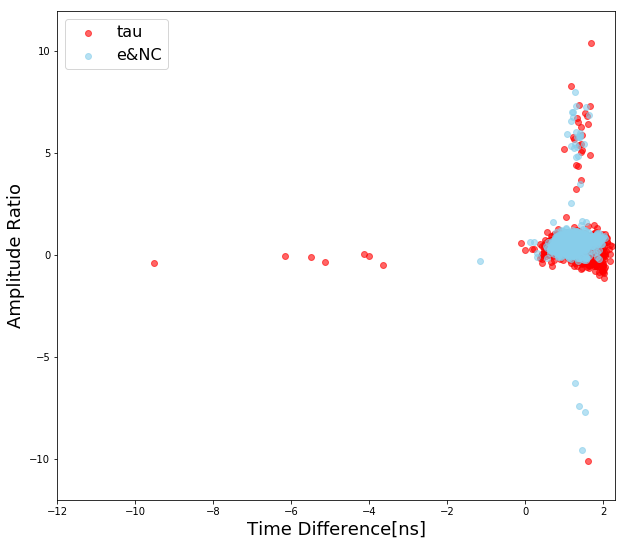

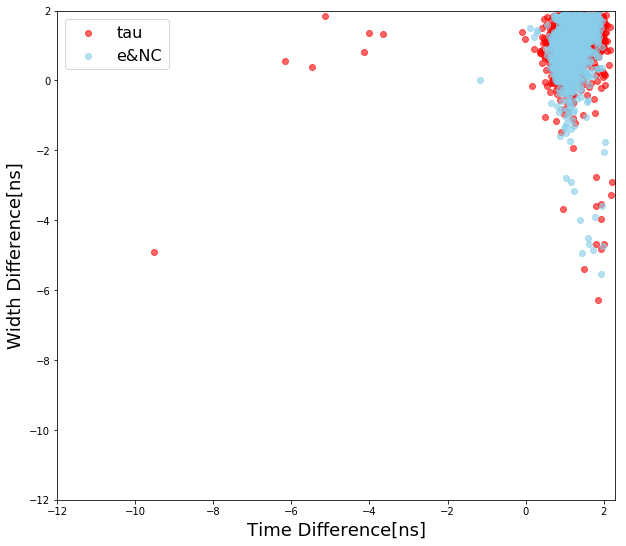

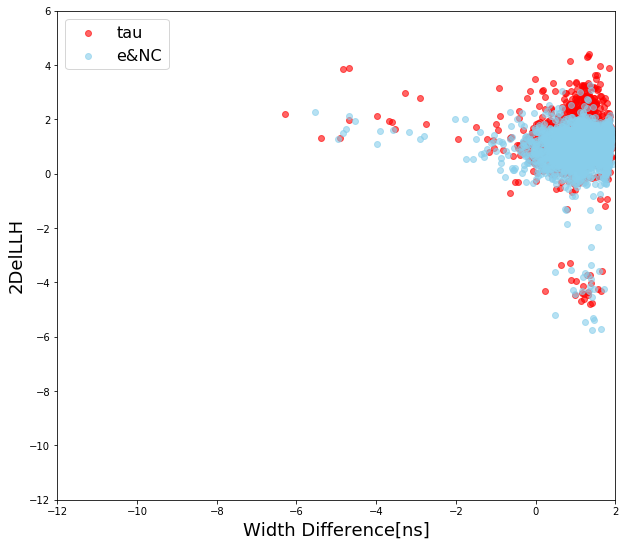

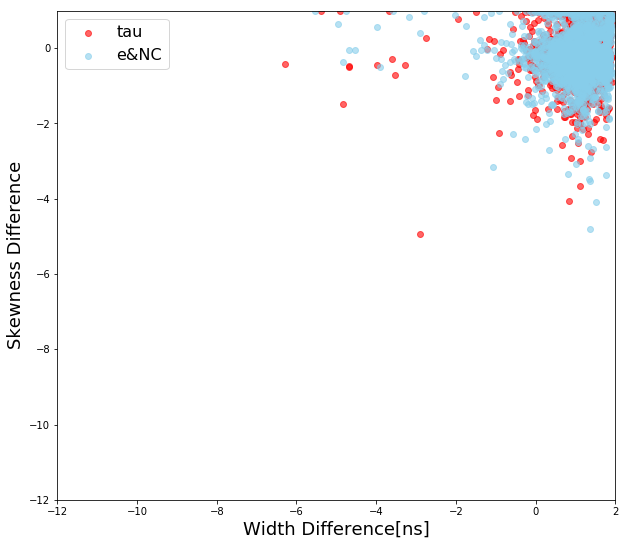

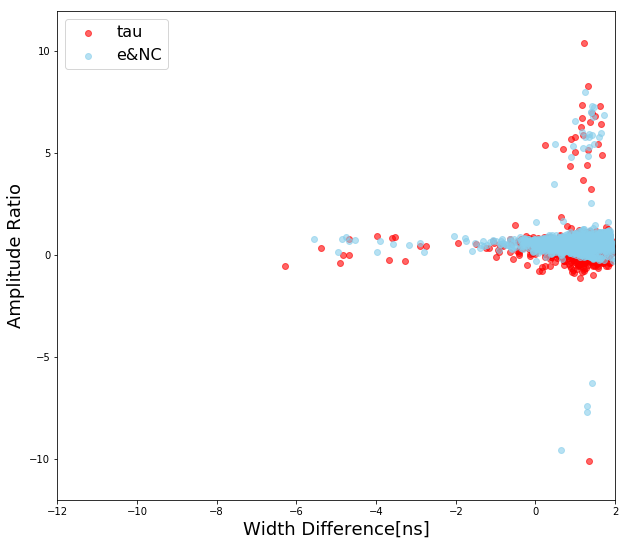

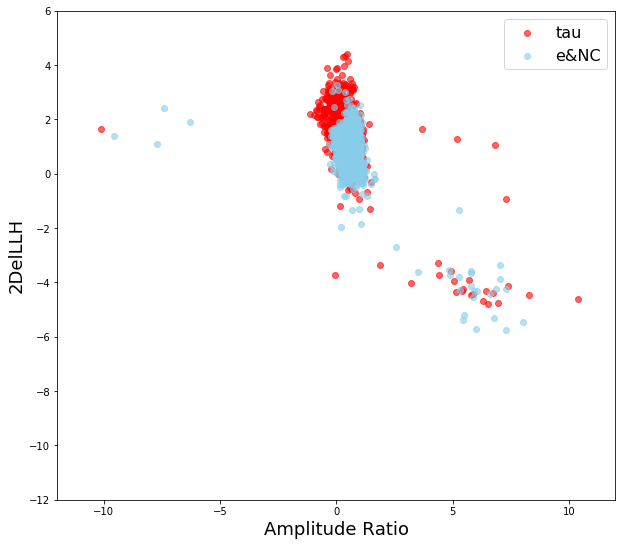

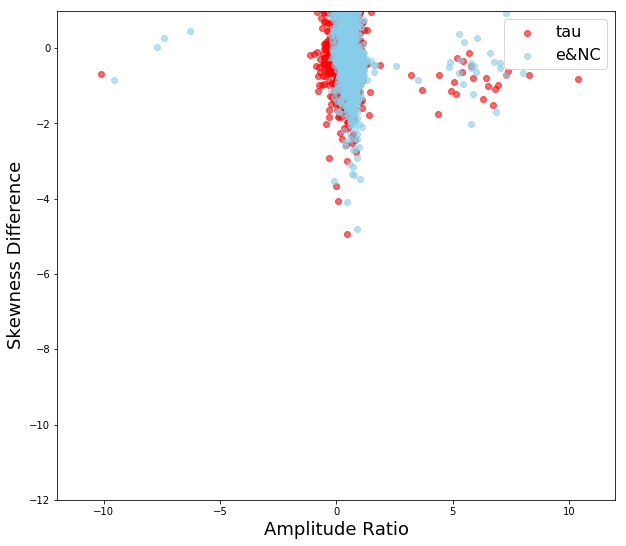

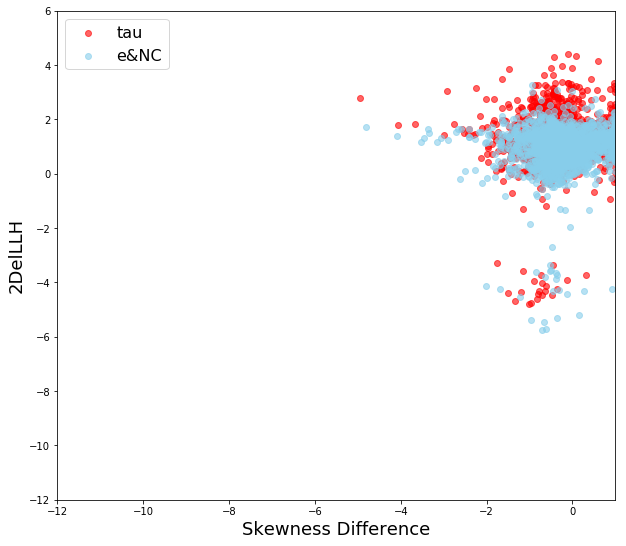

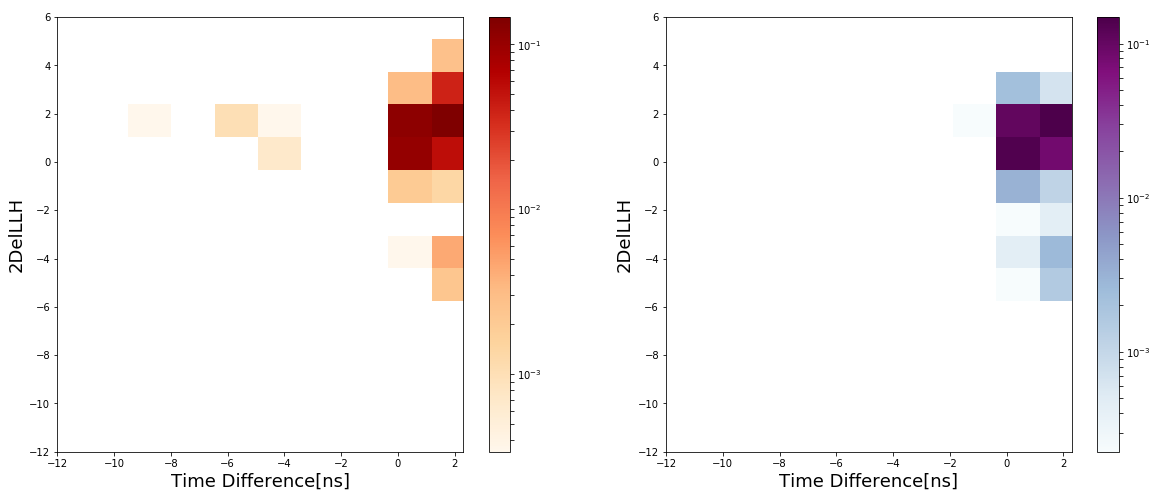

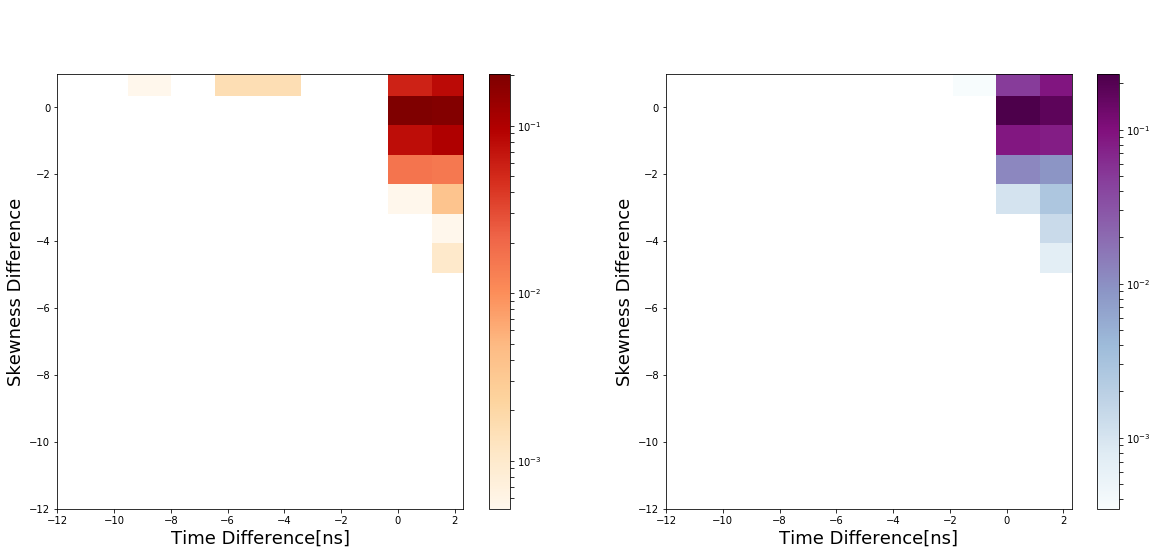

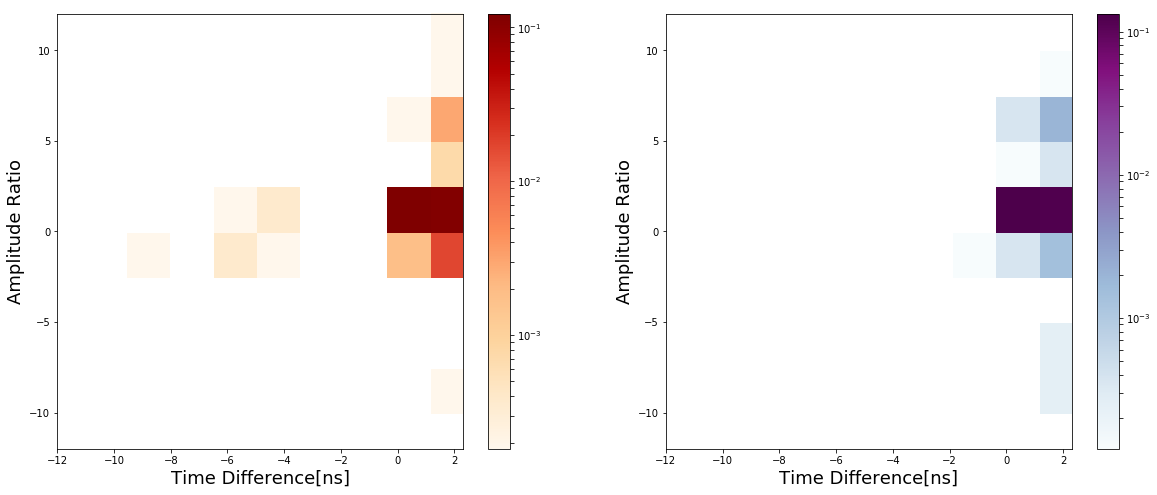

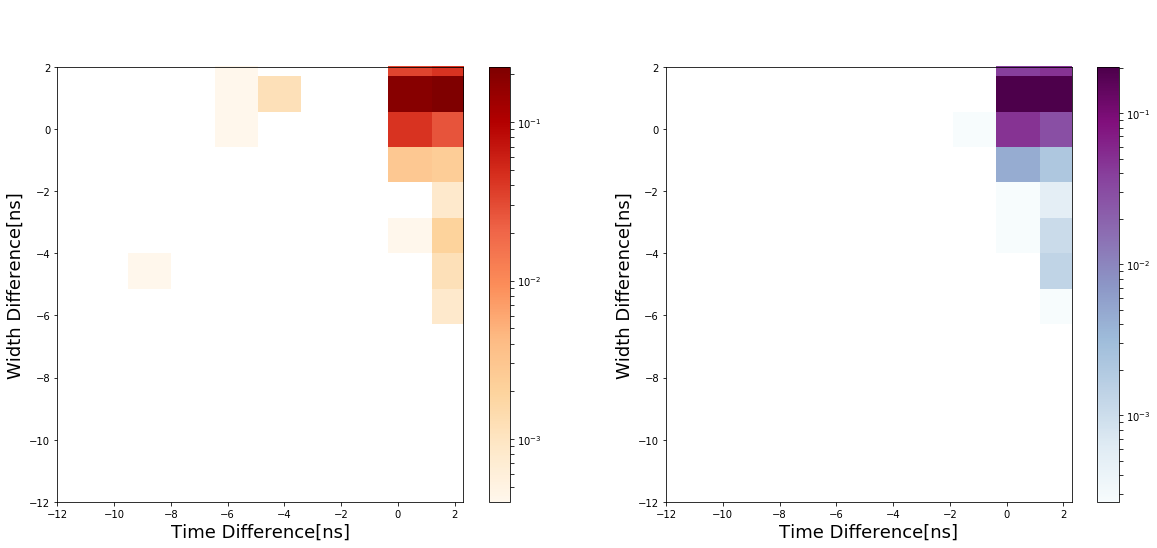

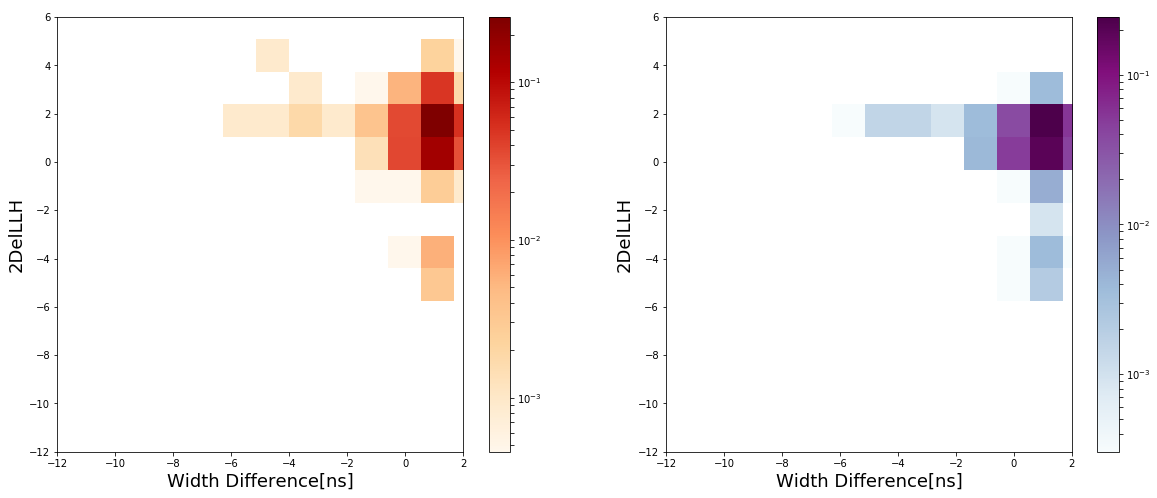

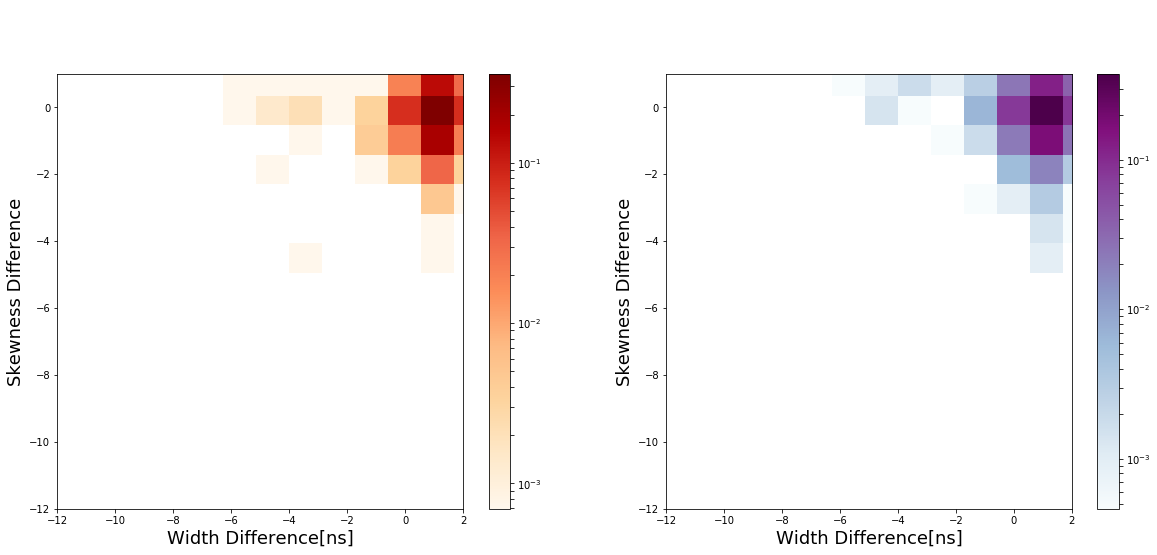

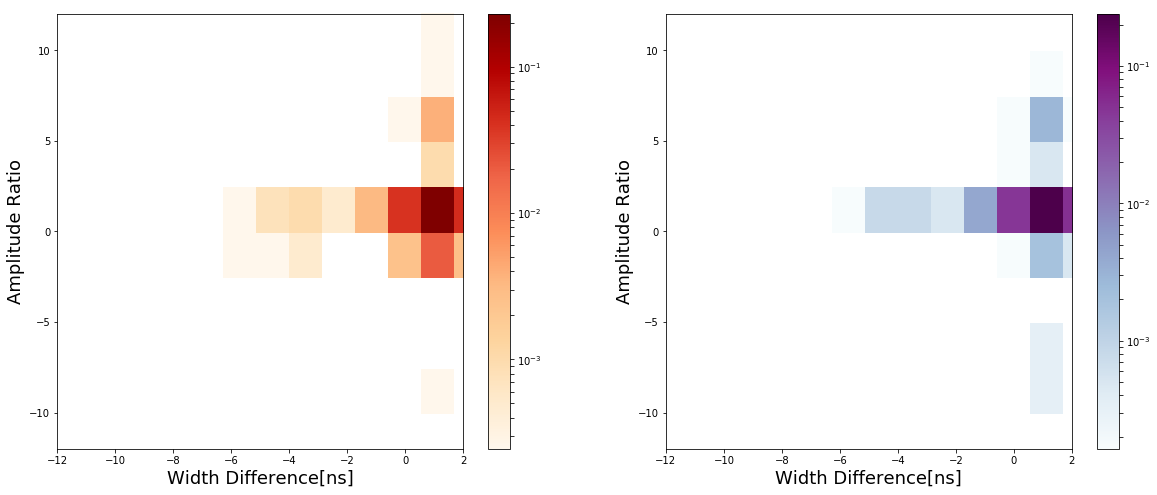

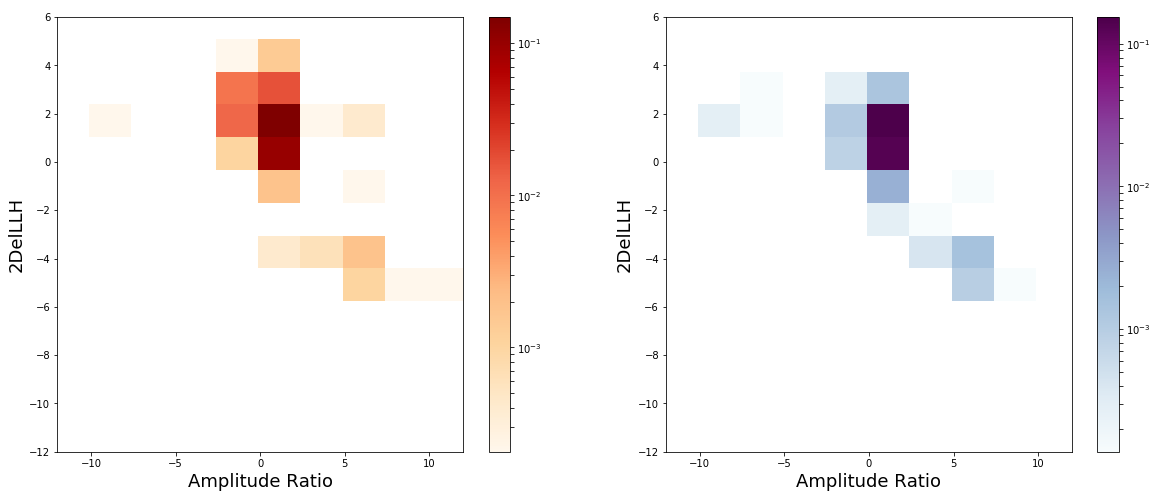

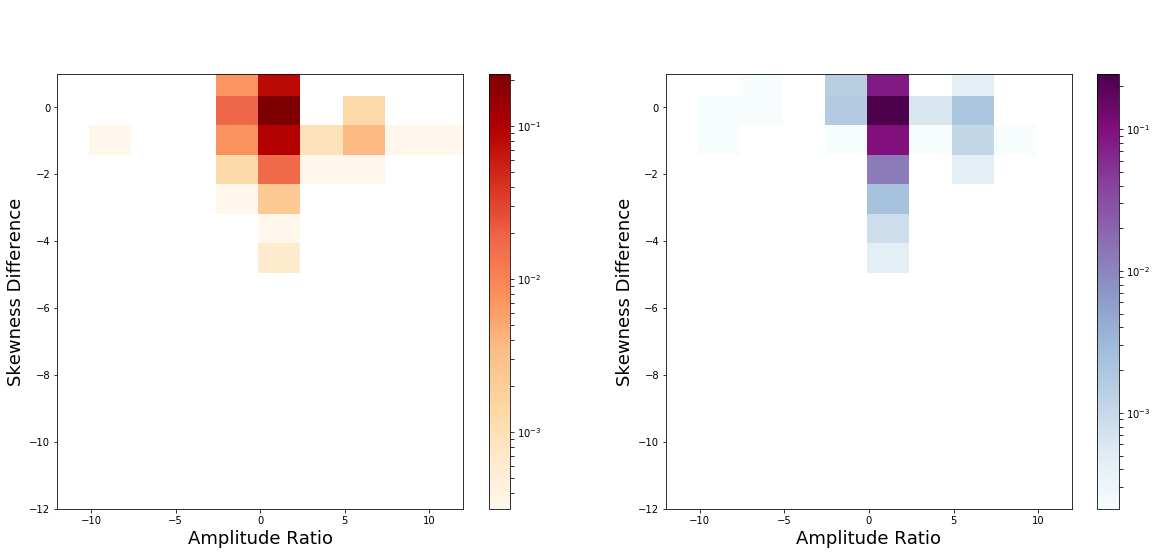

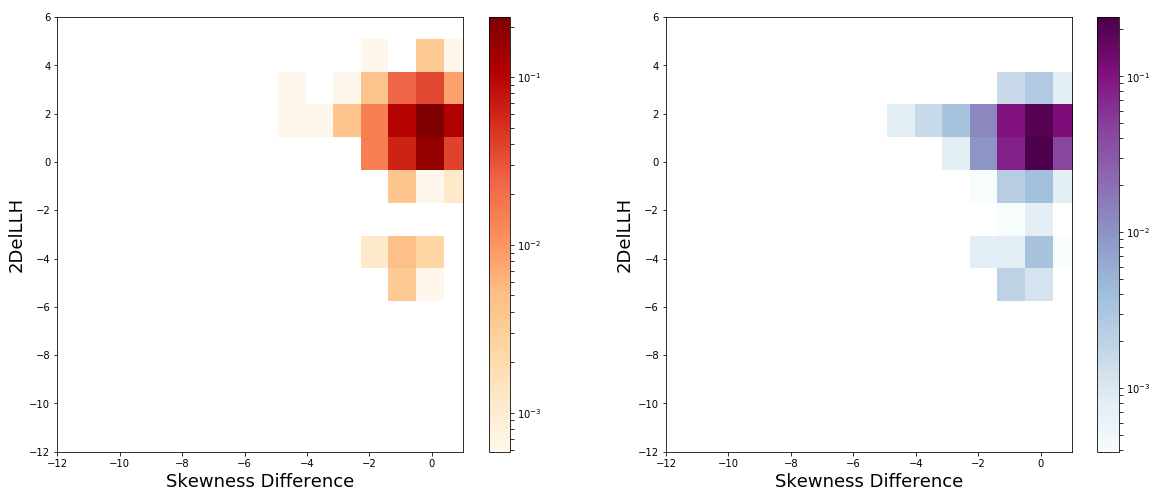

In [6]:
p.corner(log_all=True)
p.scatter(log_all=True)
p.hist2d(log_all=True, range_amp=[1e-12, 1e12])